Например, если мы хотим обучить алгоритм распознавать людей, у которых может быть обнаружено заболевание, то больные будут попадать в **позитивный** класс, а здоровые — в **негативный**.

Тогда верно определенных больных мы обозначим за $TP$ (true positive), ошибочно определенных больных — за $FP$ (false positive), верно определенных здоровых — за $TN$ (true negative), ошибочно определенных здоровых — за $FN$ (false negative).

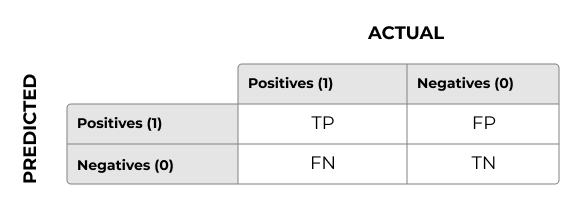

$TP$ — истинно-положительные решения;  
$TN$ — истинно-отрицательные решения;  
$FP$ — ложно-положительные решения;  
$FN$ — ложно-отрицательные решения.  

В более наглядном виде :)

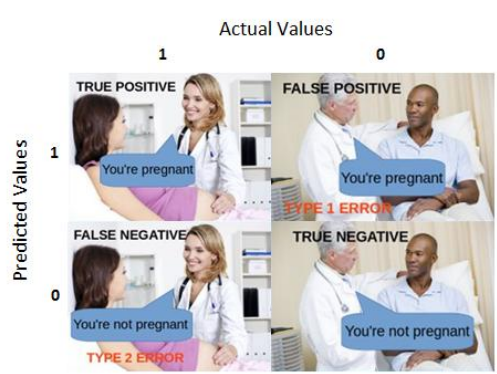

Обратите внимание на обозначенные на картинке выше новые термины: **Type 1 error** и **Type 2 error**. Это ошибки первого и второго рода. Ошибка первого рода – это ситуация, когда отвергнута правильная нулевая гипотеза.

**Нулевая гипотеза** – предположение о том, что между двумя наблюдаемыми феноменами не существует связи. Например, мы понимаем, что обычный мужчина не может забеременеть – это является верной нулевой гипотезой. Однако принимая ложноположительное решение о том, что мужчина беременный, мы совершаем ошибку первого рода. А утверждая, что беременная женщина не беременна, мы совершаем ошибку второго рода, принимая неправильную нулевую гипотезу.

## Метрики

$Accuracy = \frac{TN+TP}{TP+TN+FP+FN}$

Важно отметить, что у $Accuracy$ метрики есть довольно существенный недостаток. Она присваивает всем объектам **одинаковый вес**. Поэтому в случае несбалансированности классов она может давать нерелевантный результат.

Например, мы пытаемся найти больных в группе людей, которые пришли на диспансеризацию. Тогда **точность классификации** — это доля действительно больных среди всех, кого на диспансеризации определили как больных. А **полнота классификации** — это доля найденных больных среди всех больных.

**Точность классификации** — это доля объектов, действительно принадлежащих данному классу относительно всех объектов, которые алгоритм отнес к этому классу.

$Precision = \frac{TP}{TP+FP}$

Например, мы пытаемся найти больных в группе людей, которые пришли на диспансеризацию. Тогда **точность классификации** — это доля действительно больных среди всех, кого на диспансеризации определили как больных. А **полнота классификации** — это доля найденных больных среди всех больных.

$F-мера= \frac{2 \cdot Precision \cdot Recall }{Precision + Recall}$

## Реальизация в Python

In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:

In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

In [3]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/ramory-l/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9707602339181286
0.9743589743589743
0.9827586206896551
0.9785407725321887


Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и теперь хотите проверить качество классификатора. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.
Найдите метрику $Accuracy$.

Позитивный класс - политическая новость  
Негативный класс - экономическая новость   
Тогда:

In [7]:
political = 15
economical = 20
TP = political - 9
TN = economical - 6
FP = 6
FN = 9

$Accuracy = \frac{TN+TP}{TP+TN+FP+FN}$

In [10]:
accuracy = (TN + TP) / (TP + TN + FP + FN)

In [11]:
accuracy

0.5714285714285714

Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики $Accuracy$.

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест

In [14]:
iris = load_iris()

In [15]:
Y = iris.target ## Наша целевая переменная
X = iris.data # X - признаки

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=50)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/ramory-l/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9777777777777777
